# COMP 7150 Assignment 7 SOLUTION

Due: April 25, 2023 before midnight.

---

**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

---

#### Dataset: insurance_costs.csv

This dataset consists of 6 features and 1 target variable ("charges").  Each row is an insurance customer.  

The features are about the gender, age, bmi, the number of children, whether the customer smokes, and where the customer lives.

The "charges" is how much each customer had to pay.

In [38]:
import pandas

df = pandas.read_csv('../Datasets/insurance_costs.csv')
print(len(df))
df.sample(1)

1338


,age,sex,bmi,children,smoker,region,charges
969,39,female,34.32,5,no,southeast,8596.8278


---

Each problem is worth 15 points.  In total, there are a maximum of 20 bonus points for this assignment.



---
**Problem 1**

Among the numerical features, which one is most likely normally distributed?  Explain your answer using numerical analyses (test for normality; see Notebook 6) and visually (looking at distributions).


ANSWER:

Age and bmi are the numerical features. 

The shapiro test can tell which feature is more likely to be normally distributed.  Both pvalues are small, but BMI has much larger pvalue and is more likely to be normally distributed.

Visual analysis confirmed this.

In [7]:
df.sample(1)

,age,sex,bmi,children,smoker,region,charges
838,35,female,23.465,2,no,northeast,6402.29135


In [34]:
import seaborn
from matplotlib import pyplot
from scipy.stats import shapiro, normaltest

print('Shapiro test')
print('Age', shapiro(df['age']).pvalue)
print('BMI', shapiro(df['bmi']).pvalue)
print("D’Agostino and Pearson’s test")
print('Age', normaltest(df['age']).pvalue)
print('BMI', normaltest(df['bmi']).pvalue)


Shapiro test
Age 5.687479624670986e-22
BMI 2.609841976664029e-05
D’Agostino and Pearson’s test
Age 0.0
BMI 0.0001521377897266011


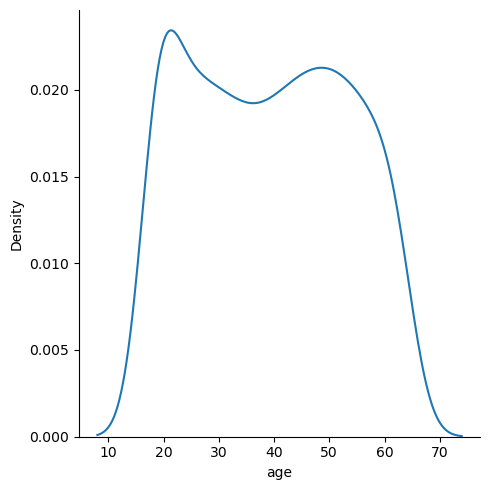

In [35]:
seaborn.displot(data=df, x='age', kind='kde')
pyplot.show()

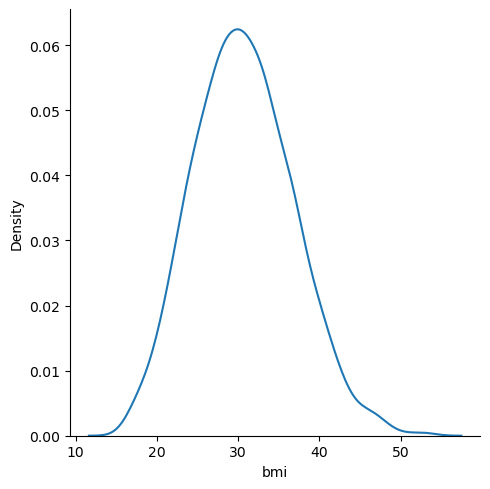

In [25]:
seaborn.displot(data=df, x='bmi', kind='kde')
pyplot.show()

---
**Problem 2**

Which region is least healthy?  Explain your answer using both numerical analyses and visual analyses.


ANSWER:

On average, the Southeast region has higher BMI and more smokers.  People in this region should be less healthy and those in the other regions.

We can use a simple bar chart (or boxplot) to visualize this.

We can also use a relplot (scatterplot) to visualize both "bmi" and "smokers".

In [44]:
df['smoker'] = df['smoker'].apply(lambda v: 1 if v=='yes' else 0)

In [45]:
df.groupby('region').mean().round(2)

,age,bmi,children,smoker,charges
region,,,,,
northeast,39.27,29.17,1.05,0.21,13406.38
northwest,39.20,29.20,1.15,0.18,12417.58
southeast,38.94,33.36,1.05,0.25,14735.41
southwest,39.46,30.60,1.14,0.18,12346.94


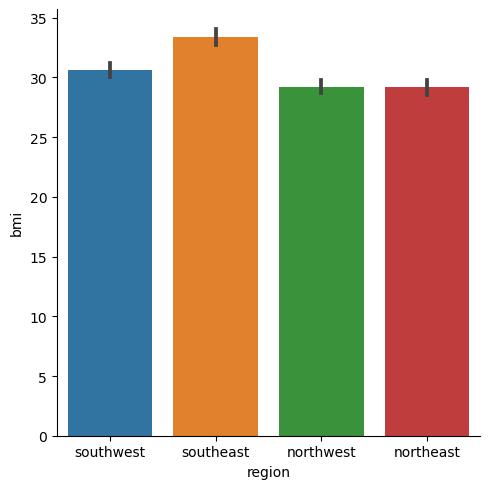

In [48]:
seaborn.catplot(data=df, x='region', y='bmi', kind='bar')
pyplot.show()

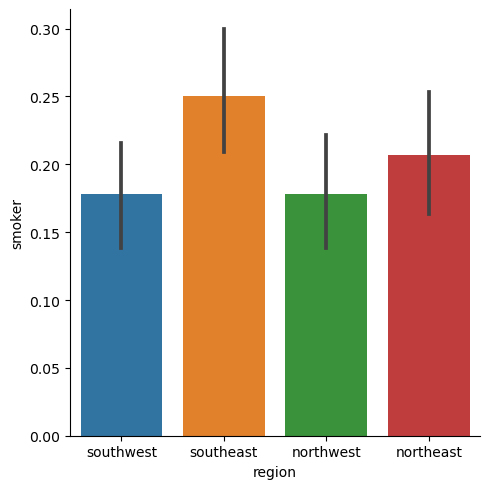

In [54]:
seaborn.catplot(data=df, x='region', y='smoker', kind='bar')
pyplot.show()

In [51]:
df2 = df.groupby('region').mean().round(2)
df2

,age,bmi,children,smoker,charges
region,,,,,
northeast,39.27,29.17,1.05,0.21,13406.38
northwest,39.20,29.20,1.15,0.18,12417.58
southeast,38.94,33.36,1.05,0.25,14735.41
southwest,39.46,30.60,1.14,0.18,12346.94


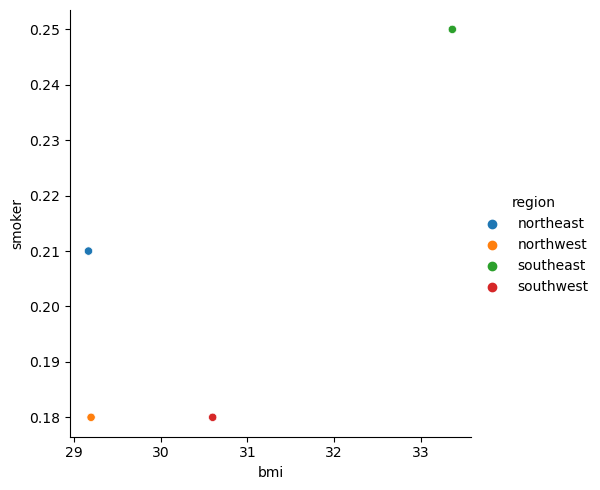

In [53]:
seaborn.relplot(data=df2, x='bmi', y='smoker', hue=df2.index)
pyplot.show()

---
**Problem 3**

Between bmi and age, which feature is more linearly related to charges?  Explain your answer by providing a visual analysis.


ANSWER:

Age seems to be more linearly related to charges. But there're 3 subgroups.

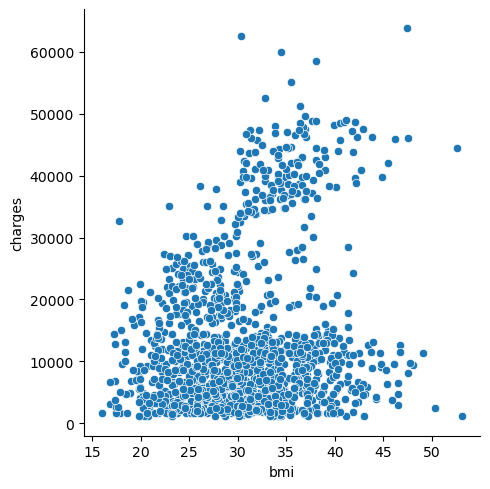

In [57]:
seaborn.relplot(data=df, x='bmi', y='charges')
pyplot.show()

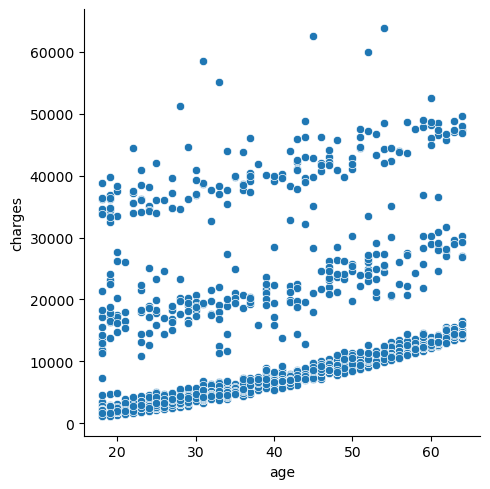

In [65]:
seaborn.relplot(data=df, x='age', y='charges')
pyplot.show()

---
**Problem 4**

Between bmi and age, which feature is more linearly related to charges? Explain your answer using linear models.


ANSWER:

Age is more linearly correlated. But the score (R2) is really low.

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

model = LinearRegression()
cv = ShuffleSplit(n_splits=100)
X1 = df[['bmi']]
X2 = df[['age']]
y = df['charges']

In [69]:
r1 = cross_validate(model, X1, y, cv=cv, scoring='r2')
print(r1['test_score'].mean().round(2))
r2 = cross_validate(model, X2, y, cv=cv, scoring='r2')
print(r2['test_score'].mean().round(2))

0.03
0.08


---
**Problem 5**

What is an appropriate scoring metric and cross validation method to measure the performance of a regression model?


ANSWER:

R2 is the right metric to use for regression.

---
**Problem 6**

Evaluate the performance of Linear Regression on predicting insurance "charges". You should use all features to build your model.  Note that some features are categorical, which must be converted to numerical features first (see Notebook 12).  


ANSWER:

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

model = LinearRegression()
cv = ShuffleSplit(n_splits=100)
X = df[['age','sex','bmi','children','smoker','region']]
X = pandas.get_dummies(X)
y = df['charges']

r = cross_validate(model, X, y, cv=cv, scoring='r2')
print(r['test_score'].mean().round(2))

0.73


---
**Problem 7**

Evaluate the performance of the non-linear method Decision Tree Regressor. You should use all features to build your model.  Vary the parameters, e.g. max_depth, min_samples_leaf, to improve the performance of the model.


ANSWER:

Decision trees are fast and with some tuning we can get up to R2 approximately 0.86.

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=100)
X = df[['age','sex','bmi','children','smoker','region']]
X = pandas.get_dummies(X)
y = df['charges']

for d in range(2,10):
    for l in range(2,20):
        model = DecisionTreeRegressor(max_depth=d, min_samples_leaf=l)
        r = cross_validate(model, X, y, cv=cv, scoring='r2')
        print(d,l,r['test_score'].mean().round(2))

2 2 0.82
2 3 0.82
2 4 0.81
2 5 0.81
2 6 0.81
2 7 0.81
2 8 0.81
2 9 0.81
2 10 0.82
2 11 0.82
2 12 0.82
2 13 0.83
2 14 0.82
2 15 0.81
2 16 0.8
2 17 0.82
2 18 0.82
2 19 0.82
3 2 0.84
3 3 0.85
3 4 0.85
3 5 0.84
3 6 0.85
3 7 0.84
3 8 0.84
3 9 0.84
3 10 0.84
3 11 0.84
3 12 0.84
3 13 0.84
3 14 0.84
3 15 0.84
3 16 0.84
3 17 0.83
3 18 0.83
3 19 0.84
4 2 0.85
4 3 0.85
4 4 0.84
4 5 0.85
4 6 0.85
4 7 0.84
4 8 0.85
4 9 0.86
4 10 0.85
4 11 0.85
4 12 0.85
4 13 0.85
4 14 0.84
4 15 0.85
4 16 0.84
4 17 0.85
4 18 0.85
4 19 0.85
5 2 0.85
5 3 0.85
5 4 0.85
5 5 0.85
5 6 0.85
5 7 0.84
5 8 0.86
5 9 0.85
5 10 0.85
5 11 0.85
5 12 0.85
5 13 0.86
5 14 0.86
5 15 0.85
5 16 0.85
5 17 0.85
5 18 0.85
5 19 0.85
6 2 0.84
6 3 0.84
6 4 0.84
6 5 0.85
6 6 0.85
6 7 0.84
6 8 0.84
6 9 0.85
6 10 0.85
6 11 0.84
6 12 0.84
6 13 0.84
6 14 0.85
6 15 0.85
6 16 0.86
6 17 0.85
6 18 0.84
6 19 0.85
7 2 0.81
7 3 0.84
7 4 0.83
7 5 0.84
7 6 0.83
7 7 0.84
7 8 0.84
7 9 0.84
7 10 0.84
7 11 0.84
7 12 0.85
7 13 0.84
7 14 0.84
7 15 0.84
7 16 0.84

---
**Problem 8**

Evaluate the performance of the non-linear method Random Forest Regressor. You should use all features to build your model.  Vary the parameters, e.g. max_depth, min_samples_leaf, to improve the performance of the model.

ANSWER:

We can get R2 approximately 0.88.  But Random Forest is a lot slower than Decision Tree.

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=20)
X = df[['age','sex','bmi','children','smoker','region']]
X = pandas.get_dummies(X)
y = df['charges']

for d in range(5,10):
    for l in range(10,20):
        model = RandomForestRegressor(n_estimators=30, max_depth=d, min_samples_leaf=l)
        r = cross_validate(model, X, y, cv=cv, scoring='r2')
        print(d,l,r['test_score'].mean().round(2))

5 10 0.85
5 11 0.87
5 12 0.86
5 13 0.87
5 14 0.87
5 15 0.86
5 16 0.85
5 17 0.85
5 18 0.85
5 19 0.85
6 10 0.87
6 11 0.87
6 12 0.86
6 13 0.89
6 14 0.86
6 15 0.86
6 16 0.85
6 17 0.85
6 18 0.86
6 19 0.86
7 10 0.86
7 11 0.86
7 12 0.86
7 13 0.88
7 14 0.85
7 15 0.85
7 16 0.85
7 17 0.85
7 18 0.85
7 19 0.85
8 10 0.86
8 11 0.86
8 12 0.85
8 13 0.85
8 14 0.86
8 15 0.86
8 16 0.85
8 17 0.85
8 18 0.85
8 19 0.86
9 10 0.86
9 11 0.85
9 12 0.85
9 13 0.84
9 14 0.84
9 15 0.85
9 16 0.86
9 17 0.87
9 18 0.85
9 19 0.84
